In [1]:
import pandas as pd
import numpy as np

In [3]:
# load the dataset
df = pd.read_csv("imdb_top_1000.csv")
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


 **Step 1 : Data Cleaning and Pre-processing**

In [4]:
# 1. Convert 'Runtime' from format like '142 min' to integer
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)

In [5]:
# 2. Clean 'Gross' column: remove commas and convert to float
df['Gross'] = df['Gross'].str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

In [6]:
# 3. Clean 'Released_Year': remove non-numeric years (like 'PG') and convert to numeric
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

In [7]:
# 4. Strip whitespace from text columns
text_cols = ['Series_Title', 'Certificate', 'Genre', 'Overview', 'Director',
             'Star1', 'Star2', 'Star3', 'Star4']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip()

In [8]:
# 5. Fill missing certificate or meta score if needed (optional)
df['Certificate'] = df['Certificate'].fillna('Unrated')

In [9]:
# Display cleaned data sample and summary
print(df[['Series_Title', 'Released_Year', 'Runtime', 'Gross']].head())
print(df[['Runtime', 'Gross', 'Released_Year']].describe())

               Series_Title  Released_Year  Runtime        Gross
0  The Shawshank Redemption         1994.0    142.0   28341469.0
1             The Godfather         1972.0    175.0  134966411.0
2           The Dark Knight         2008.0    152.0  534858444.0
3    The Godfather: Part II         1974.0    202.0   57300000.0
4              12 Angry Men         1957.0     96.0    4360000.0
           Runtime         Gross  Released_Year
count  1000.000000  8.310000e+02     999.000000
mean    122.891000  6.803475e+07    1991.217217
std      28.093671  1.097500e+08      23.297025
min      45.000000  1.305000e+03    1920.000000
25%     103.000000  3.253559e+06    1976.000000
50%     119.000000  2.353089e+07    1999.000000
75%     137.000000  8.075089e+07    2009.000000
max     321.000000  9.366622e+08    2020.000000


**Step 2: Gender Detection Without External Libraries**

In [11]:
# Create basic male and female name sets based on common actor names
female_names = {
    "Meryl", "Scarlett", "Natalie", "Jodie", "Kate", "Emma", "Sandra", "Julia",
    "Jennifer", "Charlize", "Viola", "Angelina", "Anne", "Audrey", "Greta",
    "Brie", "Reese", "Emily", "Nicole", "Renee", "Judi", "Saoirse", "Gal", "Amy"
}
male_names = {
    "Robert", "Al", "Marlon", "Leonardo", "Tom", "Brad", "Christian", "Morgan",
    "Jack", "Johnny", "Daniel", "Denzel", "Gary", "Anthony", "Harrison",
    "Russell", "Matt", "Bruce", "Michael", "Clark", "Sean", "Heath", "Jake"
}

In [12]:
# Helper function to classify gender by first name
def classify_gender(name):
    first = name.split()[0]
    if first in female_names:
        return 'female'
    elif first in male_names:
        return 'male'
    else:
        return 'unknown'

In [13]:
# Apply the classifier to top 4 stars
for i in range(1, 5):
    df[f'Star{i}_Gender'] = df[f'Star{i}'].apply(classify_gender)

# Flag: movie has at least one known female character
df['Has_Female_Character'] = df[[f'Star{i}_Gender' for i in range(1, 5)]].apply(
    lambda row: 'female' in row.values, axis=1
)

In [14]:
# Preview gender classification
print(df[['Series_Title', 'Star1', 'Star2', 'Star3', 'Star4',
          'Star1_Gender', 'Star2_Gender', 'Star3_Gender', 'Star4_Gender',
          'Has_Female_Character']].head())

               Series_Title           Star1           Star2          Star3  \
0  The Shawshank Redemption     Tim Robbins  Morgan Freeman     Bob Gunton   
1             The Godfather   Marlon Brando       Al Pacino     James Caan   
2           The Dark Knight  Christian Bale    Heath Ledger  Aaron Eckhart   
3    The Godfather: Part II       Al Pacino  Robert De Niro  Robert Duvall   
4              12 Angry Men     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4 Star1_Gender Star2_Gender Star3_Gender Star4_Gender  \
0  William Sadler      unknown         male      unknown      unknown   
1    Diane Keaton         male         male      unknown      unknown   
2   Michael Caine         male         male      unknown         male   
3    Diane Keaton         male         male         male      unknown   
4    John Fiedler      unknown      unknown      unknown      unknown   

   Has_Female_Character  
0                 False  
1                 False  
2             

**Step 3: Detect Female Narrative Clues in the Overview**

In [17]:
import re

In [18]:
# Define female-coded keywords and pronouns
female_terms = {'she', 'her', 'hers', 'woman', 'girl', 'mother', 'daughter', 'queen', 'lady'}

In [19]:
# Function to detect presence of female narrative signals in overview
def has_female_arc(overview):
    if pd.isna(overview):
        return False
    words = set(re.findall(r'\b\w+\b', overview.lower()))
    return not female_terms.isdisjoint(words)

In [20]:
# Apply this logic to create the flag
df['Female_Narrative_Arc'] = df['Overview'].apply(has_female_arc)

In [21]:
# Final Mako Mori Test: Has a female character + female narrative arc
df['Mako_Mori_Pass'] = df['Has_Female_Character'] & df['Female_Narrative_Arc']

In [22]:
# Preview results
print(df[['Series_Title', 'Has_Female_Character', 'Female_Narrative_Arc', 'Mako_Mori_Pass']].head())
print("Movies that pass Mako Mori Test:", df['Mako_Mori_Pass'].sum())

               Series_Title  Has_Female_Character  Female_Narrative_Arc  \
0  The Shawshank Redemption                 False                 False   
1             The Godfather                 False                 False   
2           The Dark Knight                 False                 False   
3    The Godfather: Part II                 False                 False   
4              12 Angry Men                 False                 False   

   Mako_Mori_Pass  
0           False  
1           False  
2           False  
3           False  
4           False  
Movies that pass Mako Mori Test: 36


**Step 4: Analyze and Visualize the Results**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Set visualization style
sns.set(style="whitegrid")

/tmp/ipython-input-25-1596104889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mako_counts.index.map({True: "Pass", False: "Fail"}), y=mako_counts.values, palette="pastel")


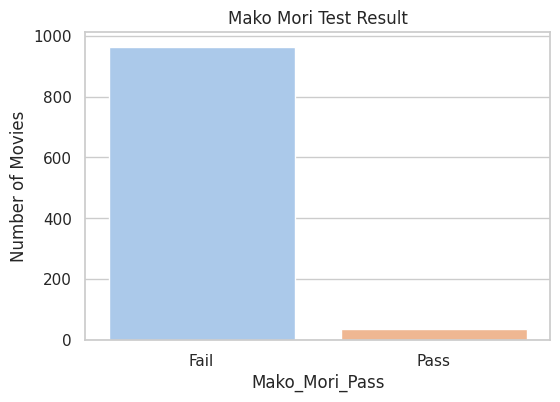

In [25]:
# 1. Pass/Fail Count
mako_counts = df['Mako_Mori_Pass'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=mako_counts.index.map({True: "Pass", False: "Fail"}), y=mako_counts.values, palette="pastel")
plt.title("Mako Mori Test Result")
plt.ylabel("Number of Movies")
plt.show()

In [26]:
# 2. Pass Rate by Genre (explode multiple genres first)
genre_df = df.copy()
genre_df = genre_df.assign(Genre=genre_df['Genre'].str.split(', '))
genre_df = genre_df.explode('Genre')
genre_group = genre_df.groupby('Genre')['Mako_Mori_Pass'].mean().sort_values(ascending=False)

/tmp/ipython-input-27-4137058472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_group.values, y=genre_group.index, palette="mako")


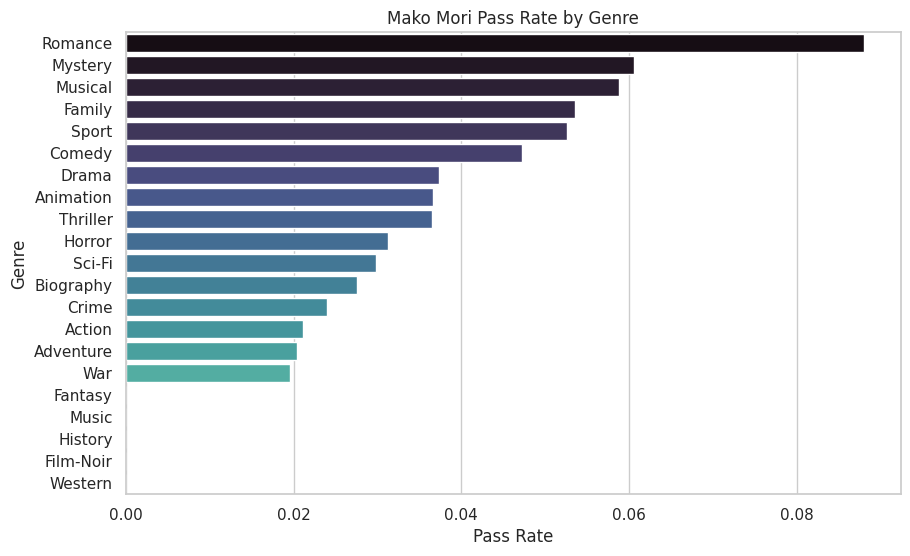

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_group.values, y=genre_group.index, palette="mako")
plt.title("Mako Mori Pass Rate by Genre")
plt.xlabel("Pass Rate")
plt.show()

In [28]:
# 3. Pass Rate Over Time
yearly = df.groupby('Released_Year')['Mako_Mori_Pass'].mean().dropna()

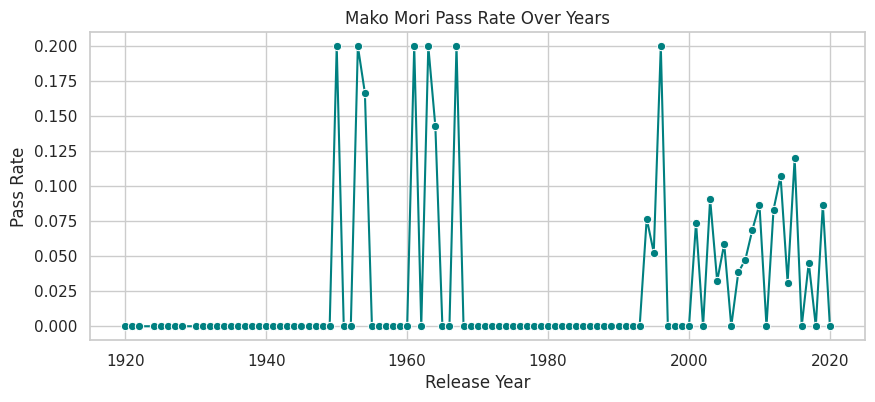

In [29]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=yearly.index, y=yearly.values, marker='o', color="teal")
plt.title("Mako Mori Pass Rate Over Years")
plt.ylabel("Pass Rate")
plt.xlabel("Release Year")
plt.grid(True)
plt.show()

In [30]:
# 4. Comparison of IMDB Rating and Gross by Test Result
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

/tmp/ipython-input-31-526972895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mako_Mori_Pass', y='IMDB_Rating', data=df, palette="Set2")


Text(0.5, 1.0, 'IMDB Rating by Mako Mori Result')

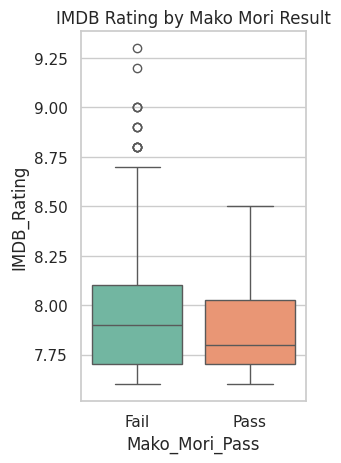

In [31]:
# IMDB Rating
plt.subplot(1, 2, 1)
sns.boxplot(x='Mako_Mori_Pass', y='IMDB_Rating', data=df, palette="Set2")
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.title("IMDB Rating by Mako Mori Result")

/tmp/ipython-input-32-692529885.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mako_Mori_Pass', y='Gross', data=df, palette="Set3")


Text(0.5, 1.0, 'Gross Revenue by Mako Mori Result')

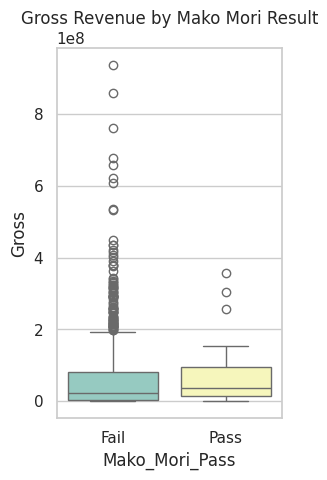

In [32]:
# Gross Revenue
plt.subplot(1, 2, 2)
sns.boxplot(x='Mako_Mori_Pass', y='Gross', data=df, palette="Set3")
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.title("Gross Revenue by Mako Mori Result")

In [33]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>